# Preparation of Airbnb Data from Maven Analystics

### Import libraries

In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

### set missing value conditions

In [3]:
na_vals = ['NA', 'missing']

### Import File

In [5]:
# set dtype for two cols because of error, set encoding to Latin becuase of latin characters
# PC
# air_df = pd.read_csv('C:/Users/conif/Documents/Airbnb_Data/Airbnb Data/Listings.csv', na_values = na_vals,dtype={"host_response_time": "string", "district": "string"}, encoding='latin1')
# Linux
air_df = pd.read_csv('/home/raf/Documents/Airbnb Data/Listings.csv', na_values = na_vals,dtype={"host_response_time": "string", "district": "string"}, encoding='latin1')

### List columns

In [6]:
# line of code from internet that lists columns with index numbers
col_mapping = [f"{c[0]}:{c[1]}" for c in enumerate(air_df.columns)]

In [7]:
col_mapping

['0:listing_id',
 '1:name',
 '2:host_id',
 '3:host_since',
 '4:host_location',
 '5:host_response_time',
 '6:host_response_rate',
 '7:host_acceptance_rate',
 '8:host_is_superhost',
 '9:host_total_listings_count',
 '10:host_has_profile_pic',
 '11:host_identity_verified',
 '12:neighbourhood',
 '13:district',
 '14:city',
 '15:latitude',
 '16:longitude',
 '17:property_type',
 '18:room_type',
 '19:accommodates',
 '20:bedrooms',
 '21:amenities',
 '22:price',
 '23:minimum_nights',
 '24:maximum_nights',
 '25:review_scores_rating',
 '26:review_scores_accuracy',
 '27:review_scores_cleanliness',
 '28:review_scores_checkin',
 '29:review_scores_communication',
 '30:review_scores_location',
 '31:review_scores_value',
 '32:instant_bookable']

## Inspect Data

In [8]:
# use shape method to get the total number of rows and columns
air_df.shape

(279712, 33)

In [9]:
# some descriptive stats
air_df.describe()

,listing_id,host_id,host_response_rate,host_acceptance_rate,host_total_listings_count,latitude,longitude,accommodates,bedrooms,price,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
count,2.797120e+05,2.797120e+05,150930.000000,166625.000000,279547.000000,279712.000000,279712.000000,279712.000000,250277.000000,279712.000000,279712.000000,2.797120e+05,188307.000000,187999.000000,188047.000000,187941.000000,188025.000000,187937.000000,187927.000000
mean,2.638196e+07,1.081658e+08,0.865939,0.827168,24.581612,18.761862,12.595075,3.288736,1.515509,608.792737,8.050967,2.755860e+04,93.405195,9.565476,9.312869,9.701534,9.698593,9.633994,9.335364
std,1.442576e+07,1.108570e+08,0.283744,0.289202,284.041143,32.560343,73.081309,2.133379,1.153080,3441.826611,31.518946,7.282875e+06,10.070437,0.990878,1.146072,0.867434,0.886884,0.833234,1.042625
min,2.577000e+03,1.822000e+03,0.000000,0.000000,0.000000,-34.264400,-99.339630,0.000000,1.000000,0.000000,1.000000,1.000000e+00,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
25%,1.384462e+07,1.720656e+07,0.900000,0.780000,1.000000,-22.964390,-43.198040,2.000000,1.000000,75.000000,1.000000,4.500000e+01,91.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000
50%,2.767098e+07,5.826911e+07,1.000000,0.980000,1.000000,40.710785,2.382780,2.000000,1.000000,150.000000,2.000000,1.125000e+03,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
75%,3.978485e+07,1.832853e+08,1.000000,1.000000,4.000000,41.908610,28.986730,4.000000,2.000000,474.000000,5.000000,1.125000e+03,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
max,4.834353e+07,3.901874e+08,1.000000,1.000000,7235.000000,48.904910,151.339810,16.000000,50.000000,625216.000000,9999.000000,2.147484e+09,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [11]:
air_df

,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,281420,"Beautiful Flat in le Village Montmartre, Paris",1466919,2011-12-03,"Paris, Ile-de-France, France",<NA>,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
1,3705183,39 mÃÂ² Paris (Sacre CÃ âur),10328771,2013-11-29,"Paris, Ile-de-France, France",<NA>,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
2,4082273,"Lovely apartment with Terrace, 60m2",19252768,2014-07-31,"Paris, Ile-de-France, France",<NA>,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
3,4797344,Cosy studio (close to Eiffel tower),10668311,2013-12-17,"Paris, Ile-de-France, France",<NA>,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
4,4823489,Close to Eiffel Tower - Beautiful flat : 2 rooms,24837558,2014-12-14,"Paris, Ile-de-France, France",<NA>,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279707,38338635,Appartement T2 neuf prÃÂ¨s du tram T3a Porte ...,31161181,2015-04-13,"Paris, Ile-de-France, France",<NA>,NaN,NaN,f,1.0,...,1,7,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
279708,38538692,Cozy Studio in Montmartre,10294858,2013-11-27,"Paris, Ile-de-France, France",<NA>,NaN,NaN,f,1.0,...,7,15,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
279709,38683356,Nice and cosy mini-appartement in Paris,2238502,2012-04-27,"Paris, Ile-de-France, France",<NA>,NaN,NaN,f,1.0,...,6,30,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
279710,39659000,Charming apartment near Rue Saint Maur / Oberk...,38633695,2015-07-16,"Paris, Ile-de-France, France",<NA>,NaN,NaN,f,1.0,...,3,18,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f


## Calculate missing values

In [13]:
# count non-missing values
print(air_df.count())

listing_id                     279712
name                           279539
host_id                        279712
host_since                     279547
host_location                  278872
host_response_time             150930
host_response_rate             150930
host_acceptance_rate           166625
host_is_superhost              279547
host_total_listings_count      279547
host_has_profile_pic           279547
host_identity_verified         279547
neighbourhood                  279712
district                        37012
city                           279712
latitude                       279712
longitude                      279712
property_type                  279712
room_type                      279712
accommodates                   279712
bedrooms                       250277
amenities                      279712
price                          279712
minimum_nights                 279712
maximum_nights                 279712
review_scores_rating           188307
review_score

In [14]:
# subtract non-missing from total

In [15]:
num_rows= air_df.shape[0]

In [16]:
print(num_rows)

279712


In [17]:
num_missing = num_rows - air_df.count()

### Missing Values

In [18]:
# MISSING VALUES
print(num_missing)

listing_id                          0
name                              173
host_id                             0
host_since                        165
host_location                     840
host_response_time             128782
host_response_rate             128782
host_acceptance_rate           113087
host_is_superhost                 165
host_total_listings_count         165
host_has_profile_pic              165
host_identity_verified            165
neighbourhood                       0
district                       242700
city                                0
latitude                            0
longitude                           0
property_type                       0
room_type                           0
accommodates                        0
bedrooms                        29435
amenities                           0
price                               0
minimum_nights                      0
maximum_nights                      0
review_scores_rating            91405
review_score

## Deal with outliers

### Plots with outliers

In [20]:
# make a boxplot function
def plot_boxplot(df, ft):
    df.boxplot(column=[ft])
    plt.grid(False)
    plt.show()
    


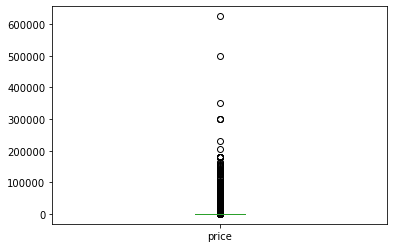

In [21]:
plot_boxplot(air_df, "price")

array([[<AxesSubplot:title={'center':'price'}>]], dtype=object)

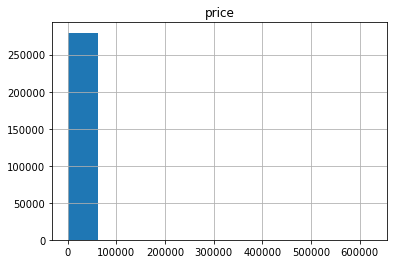

In [22]:
air_df.hist("price")

### Remove Outliers

In [23]:
# create a function to remove outliers (from a copy of the dataframe)
def outliers(df, ft):
    Q1=df[ft].quantile(0.25)
    Q3=df[ft].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    ls = df.index[ (df[ft] < lower_bound) | (df[ft] > upper_bound) ]
    return ls
    

In [24]:
# RAF to print bounds
def outlier_print(df, ft):
    Q1=df[ft].quantile(0.25)
    Q3=df[ft].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    print(str(lower_bound) + " " + str(upper_bound))
    # print(f"lower{lower_bound} ")
    return
    

In [25]:
outlier_print(air_df, 'price')

-523.5 1072.5


In [26]:
# RAF reate a function for upper outliers only, not used here
def upper_outliers(df, ft):
    Q1=df[ft].quantile(0.25)
    Q3=df[ft].quantile(0.75)
    IQR = Q3 -Q1
    #lower_bound = Q1- 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    ls = df.index[ (df[ft] > upper_bound) ]
    return ls

In [27]:
# create a list of index numbers for outliers
# can put more features in list additional to price
index_list=[]
for feature in ["price"]:
   index_list.extend(outliers(air_df, feature ))

In [28]:
# no of outliers
len(index_list)

31395

In [29]:
# new function called remove which returns a cleaned dataframe without outliers

In [30]:
def remove(df, ls):
    # sort list and make unique
    ls=sorted(set(ls))
    df=df.drop(ls)
    return df


In [31]:
air_df_cleaned = remove(air_df, index_list)

In [32]:
air_df_cleaned.shape

(248317, 33)

### Output cleaned dataframe to CSV file

In [35]:
# Output cleaned dataframe to CSV file -----------------------------------------------------------------------------
# PC
# air_df_cleaned.to_csv("C:/Users/conif/Documents/Airbnb_Data/Airbnb Data/Listings_cleaned.csv", index=False)

###  Plots without outliers

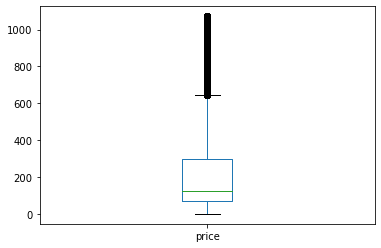

In [36]:
plot_boxplot(air_df_cleaned, "price")

array([[<AxesSubplot:title={'center':'price'}>]], dtype=object)

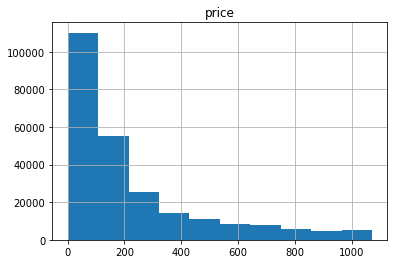

In [37]:
air_df_cleaned.hist("price")

In [38]:
air_df_cleaned['price']

0          53
1         120
2          89
3          58
4          60
         ... 
279707    120
279708     60
279709     50
279710    105
279711     70
Name: price, Length: 248317, dtype: int64